#### Week 16 - In Class Assignment

##### Angela Spencer - January 12,  2022

##### 1. Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image

In [9]:
diabetes_df = pd.read_csv("../Datasets/diabetes.csv")
X_1 = diabetes_df.drop('Outcome', axis=1)
y_1 = diabetes_df['Outcome']

In [14]:
## Use RFE for feature selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = tree.DecisionTreeClassifier(max_depth=10, random_state=42)

rfe = RFE(estimator, n_features_to_select = 3)

selector = rfe.fit(X_1, y_1)

## select columns X2, X6, X7
selector.support_

array([False,  True, False, False, False,  True,  True, False])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#convert RFE output into columns, create new X and y variables
cols = X_1.columns[selector.support_==True]

X = diabetes_df[cols]
y = diabetes_df['Outcome']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#scale data to be analyzed
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
#create and fit decision tree classifier
model = tree.DecisionTreeClassifier(max_depth=10, random_state=42, criterion = 'entropy')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
#show accuracy score before tuning
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       151
           1       0.54      0.54      0.54        80

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.68      0.68       231



In [22]:
#use Grid search for parameter tuning

import numpy as np
from sklearn.model_selection import GridSearchCV

#grid search validation
max_depth_range = np.arange(5,16,1)
param_grid = {'max_depth':max_depth_range, 'criterion':['gini', 'entropy']}
cv = GridSearchCV(tree.DecisionTreeClassifier(),param_grid, cv=6)
cv.fit(X,y)
cv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [24]:
#create and fit new decision tree classifier with CV parameters
model = tree.DecisionTreeClassifier(max_depth=6, random_state=42, criterion = 'entropy')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#accuracy and precision have improved
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       151
           1       0.59      0.66      0.62        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.73       231



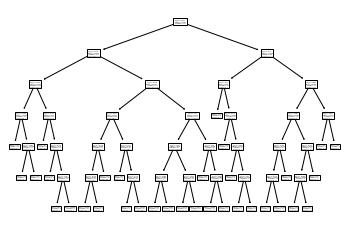

In [111]:
import matplotlib.pyplot as plt

tree.plot_tree(model)
plt.savefig("diabetes_tree.svg")
plt.show()

#### 2. Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)
Example input:

      [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]

Example output:

      Nichole, Tanisha & Maggie

In [92]:
test = [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]

In [104]:
def name_change (array):
    
    for x in array[0:1]:
        return x

In [105]:
name_change(test)

{'name': 'Nichole'}

In [93]:
for i, name in enumerate(test):
    for n in name.values():
        if i < len(test) -1:
            print(n + ',')
        else:
            print(' & ' + n)

Nichole,
Tanisha,
 & Maggie


In [107]:
def name_nonsense(name_input):
    string = ''
    for i, name in enumerate(names_list):
        for n in name.values():
            if i <= len(names_list)-1:
                string = string + n
            else:
                string = string + ', ' + n
    return string

In [108]:
name_nonsense(test)

'NicholeTanishaMaggie'

In [100]:
### This is the one!!

def name_string(names_list):
    string = ''
    for i, name in enumerate(names_list):
        for n in name.values():
            if i ==0:
                string = string + n
            elif i == len(names_list)-1:
                string = string + ' & ' + n
            else:
                string = string + ', ' + n
    return string

In [101]:
name_string(test)

'Nichole, Tanisha & Maggie'

In [109]:
test2 = [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}, {'name':'Eva'} ]
name_string(test2)

'Nichole, Tanisha, Maggie & Eva'